In [1]:
import os
import numpy as np
import nibabel as nib #Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt

In [2]:
subjects_dir = './data/Extracted/out/'
brainmask_path = 'mri/brainmask.mgz'

In [3]:
#list of all subject directories
subjects_folders = [f for f in os.listdir(subjects_dir)]
brains = [os.path.join(subjects_dir, subject, brainmask_path) for subject in subjects_folders]

In [4]:
# Load all brains    
np_brains = np.array([nib.load(brain).get_data() for brain in brains])

IXI629-Guys-1095-T1.nii ./data/Extracted/out/IXI629-Guys-1095-T1.nii/mri/brainmask.mgz
IXI069-Guys-0769-T1.nii ./data/Extracted/out/IXI069-Guys-0769-T1.nii/mri/brainmask.mgz
IXI396-HH-2115-T1.nii ./data/Extracted/out/IXI396-HH-2115-T1.nii/mri/brainmask.mgz
IXI525-HH-2413-T1.nii ./data/Extracted/out/IXI525-HH-2413-T1.nii/mri/brainmask.mgz
IXI399-Guys-0966-T1.nii ./data/Extracted/out/IXI399-Guys-0966-T1.nii/mri/brainmask.mgz
IXI494-Guys-1008-T1.nii ./data/Extracted/out/IXI494-Guys-1008-T1.nii/mri/brainmask.mgz
IXI226-HH-1618-T1.nii ./data/Extracted/out/IXI226-HH-1618-T1.nii/mri/brainmask.mgz
IXI409-Guys-0960-T1.nii ./data/Extracted/out/IXI409-Guys-0960-T1.nii/mri/brainmask.mgz
IXI571-IOP-1154-T1.nii ./data/Extracted/out/IXI571-IOP-1154-T1.nii/mri/brainmask.mgz
IXI239-HH-2296-T1.nii ./data/Extracted/out/IXI239-HH-2296-T1.nii/mri/brainmask.mgz
IXI411-Guys-0959-T1.nii ./data/Extracted/out/IXI411-Guys-0959-T1.nii/mri/brainmask.mgz
IXI225-Guys-0832-T1.nii ./data/Extracted/out/IXI225-Guys-0832

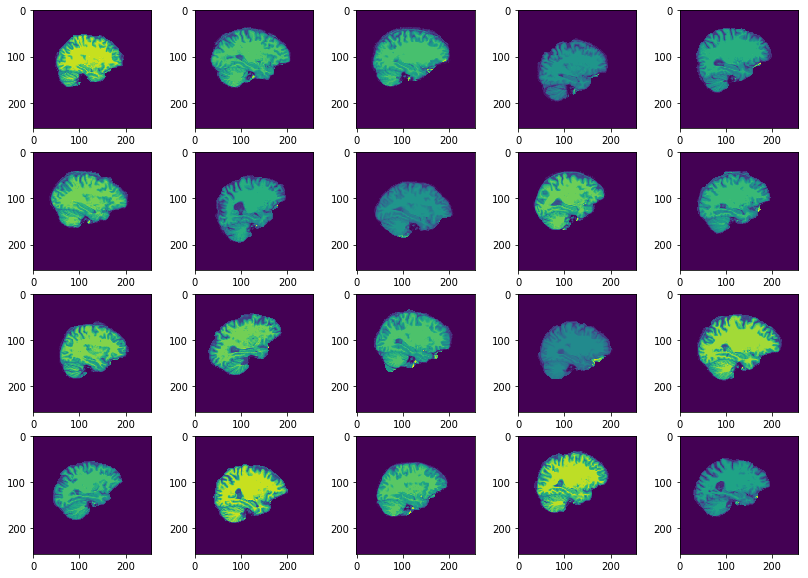

In [5]:
for i,j,k in zip(subjects_folders, brains, range(20)):
    print(i,j)

dimension = 0
s = 100
plt.figure(figsize=(14, 10))
for i in range(1, 5*4+1):
    plt.subplot(4,5,i)
    plt.imshow(np.take(np_brains[i], s, dimension))
plt.show()

In [6]:
# https://stackoverflow.com/questions/31400769/bounding-box-of-numpy-array
def bbox2_3D(img):

    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

# Get average brain and crop according to non zero values
# can cause memory problem
average_brain = np.mean(np_brains, axis=0)
minmax = bbox2_3D(average_brain)

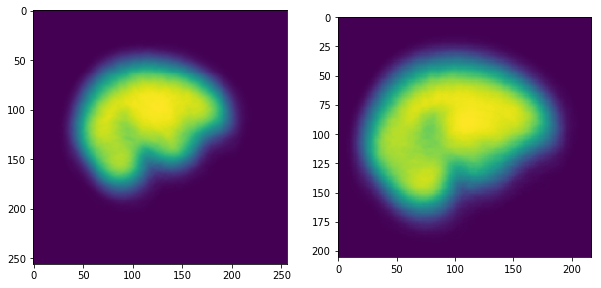

In [7]:
plt.figure(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(np.take(average_brain, s, dimension))

plt.subplot(1,2,2)
plt.imshow(np.take(average_brain[minmax[0]:minmax[1], minmax[2]:minmax[3], minmax[4]:minmax[5]], s, dimension))
plt.show()

In [8]:
# Crop brains
np_brains = np_brains[:,minmax[0]:minmax[1], minmax[2]:minmax[3], minmax[4]:minmax[5]]

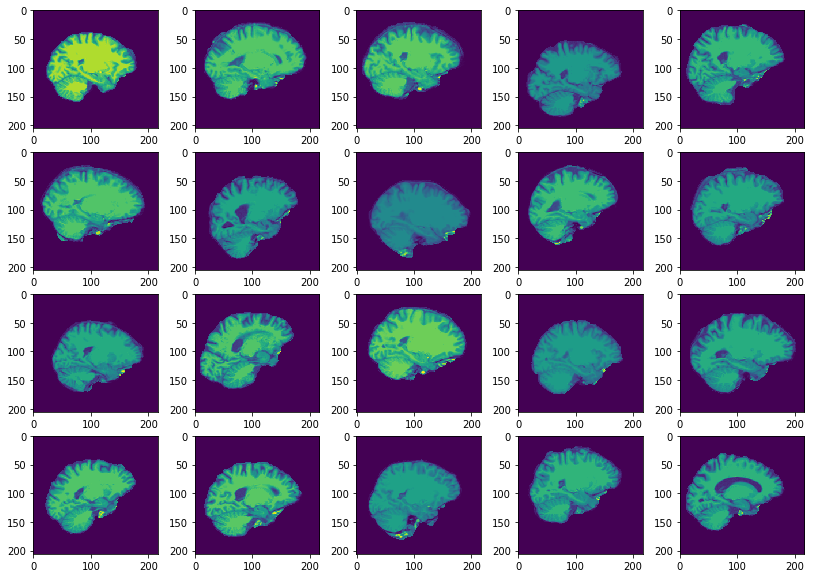

In [9]:
plt.figure(figsize=(14, 10))
for i in range(1, 5*4+1):
    plt.subplot(4,5,i)
    plt.imshow(np.take(np_brains[i], s, dimension))
plt.show()

In [10]:
np.save('brains_tmp.npy', np_brains)
np.save('subject_tmp.npy', subjects_folders)